In [1]:
import pandas as pd
import numpy as np

<h5 align='right'>Open the file</h5>
<hr color='f47b0a'>

In [33]:
path = '/content/drive/MyDrive/Colab Notebooks/video_data.json'

In [34]:
df = pd.read_json(path)

In [4]:
df.head()

,kind,etag,id,snippet,contentDetails,statistics
0,youtube#video,BMiuxV0EaQe68H2Q-FTv5h7L384,xsPlB4WAmRc,"{'publishedAt': '2022-02-09T17:15:40Z', 'chann...","{'duration': 'PT22S', 'dimension': '2d', 'defi...","{'viewCount': '20155', 'likeCount': '764', 'fa..."
1,youtube#video,cDx9EEKQ_Awdx5zsfhlV9eEluMc,q-r6V_PgtcY,"{'publishedAt': '2022-02-07T15:00:36Z', 'chann...","{'duration': 'PT6M56S', 'dimension': '2d', 'de...","{'viewCount': '46146', 'likeCount': '1685', 'f..."
2,youtube#video,5WbCTsDJP88YP7ZFOTA5VyqzzjA,jxe870HmYBE,"{'publishedAt': '2022-02-03T13:29:23Z', 'chann...","{'duration': 'PT2M6S', 'dimension': '2d', 'def...","{'viewCount': '736223', 'likeCount': '26527', ..."
3,youtube#video,l8qUCiS7o06iMgAakD9mBmIU3DY,yxVOownOSRs,"{'publishedAt': '2022-02-01T17:09:05Z', 'chann...","{'duration': 'PT25S', 'dimension': '2d', 'defi...","{'viewCount': '49902', 'likeCount': '1486', 'f..."
4,youtube#video,Jz-MAsGwkAktqaA3N6EvpW_d1N8,3-yglCSCPng,"{'publishedAt': '2022-01-14T13:00:01Z', 'chann...","{'duration': 'PT22S', 'dimension': '2d', 'defi...","{'viewCount': '228924', 'likeCount': '5724', '..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   kind            5723 non-null   object
 1   etag            5723 non-null   object
 2   id              5723 non-null   object
 3   snippet         5723 non-null   object
 4   contentDetails  5723 non-null   object
 5   statistics      5723 non-null   object
dtypes: object(6)
memory usage: 268.4+ KB


In [6]:
df = df.drop(columns=['etag', 'kind'])

<h5 align='right'>Select Desired Subcolumns</h5>
<hr color='f47b0a'>

In [ ]:
df['snippet'][999]

{'categoryId': '17',
 'channelId': 'UCblfuW_4rakIf2h6aqANefA',
 'channelTitle': 'Red Bull',
 'defaultAudioLanguage': 'en',
 'description': '►Watch the full episode here: http://win.gs/WayPastMidnightEp2\nGnarpark founder Harvey Brown gives a rundown of the origins of his famous late night bicycle race and how it\'s become a welcoming community of sleepless cyclists all over London. It\'s fast and furious fixed gear action that anyone can join. \n_\n\nExperience the world of Red Bull like you have never seen it before. With the best action sports clips on the web and original series, prepare for your "stoke factor" to be at an all time high.\n\nWatch Red Bull TV: http://win.gs/WatchRBTV\n\nSee into our world: http://goo.gl/J49U\n\nRed Bull on Facebook: http://win.gs/redbullfb\n\nRed Bull on Twitter: http://win.gs/redbulltwitter\n\nSubscribe to Red Bull on Youtube: http://win.gs/SubToRedBull\n\nSubscribe to the Red Bulletin: http://win.gs/TheRedBulletin\n\nSign up for our Newsletter here

In [ ]:
mask = df['snippet'].apply(pd.Series)
df['defaultAudioLanguage'] = mask['defaultAudioLanguage']
df['title'] = mask['title']
df['publishedAt']= mask['publishedAt']
df['tags'] = mask['tags']
df.head()

In [44]:
df['tags']= pd.Series(df['tags'], dtype="string")
df['tags']=df['tags'].fillna('None')
df['tagsCount'] = df['tags'].apply(lambda x: len(x.split()))
df = df.drop(columns=['snippet'])
print(df['tags'][2])
print(df['tagsCount'][2])

['red bull', 'redbull', 'action sports', 'extreme sports', 'sport videos', 'action', 'sport', 'Max Verstappen', 'max', 'vertappen', 'formula 1', 'formula one', 'f1', 'f1 car', 'f1 car on ice', 'red bull racing', 'ice', 'snow', 'ice track', 'spiked tyres', 'tires', 'tyres', 'pirelli', 'grand prix', 'grand prix ice race', 'GP', 'speedway', 'ice speedway', 'speedway racing', 'race', 'racing', 'motorbike', 'motobike', 'motorcycle', 'driving on ice', 'drive on ice', 'drive on snow', 'race on snow', 'race on ice', 'ice race', 'gp ice race', 'Franky Zorn', 'austria', 'f1 2022']
80


In [45]:
df['statistics'][999]

{'commentCount': '49',
 'favoriteCount': '0',
 'likeCount': '1404',
 'viewCount': '104965'}

In [46]:
mask2 = df['statistics'].apply(pd.Series)
df['commentCount'] = mask2['commentCount']
df['favoriteCount'] = mask2['favoriteCount']
df['likeCount'] = mask2['likeCount']
df['viewCount'] = mask2['viewCount']
df= df.drop(columns=['statistics'])
df.head()

,kind,etag,id,snippet,contentDetails,defaultAudioLanguage,title,publishedAt,tags,tagsCount,commentCount,favoriteCount,likeCount,viewCount
0,youtube#video,BMiuxV0EaQe68H2Q-FTv5h7L384,xsPlB4WAmRc,"{'publishedAt': '2022-02-09T17:15:40Z', 'chann...","{'duration': 'PT22S', 'dimension': '2d', 'defi...",en,timbersports training is wild 🪚 🪓,2022-02-09T17:15:40Z,None,1,15,0,764,20155
1,youtube#video,cDx9EEKQ_Awdx5zsfhlV9eEluMc,q-r6V_PgtcY,"{'publishedAt': '2022-02-07T15:00:36Z', 'chann...","{'duration': 'PT6M56S', 'dimension': '2d', 'de...",en,Jet Boats For Breakfast & Backcountry Sled Lau...,2022-02-07T15:00:36Z,"['red bull', 'redbull', 'action sports', 'extr...",63,82,0,1685,46146
2,youtube#video,5WbCTsDJP88YP7ZFOTA5VyqzzjA,jxe870HmYBE,"{'publishedAt': '2022-02-03T13:29:23Z', 'chann...","{'duration': 'PT2M6S', 'dimension': '2d', 'def...",en,Max Verstappen’s Icy Pre-Season Fun: Driving A...,2022-02-03T13:29:23Z,"['red bull', 'redbull', 'action sports', 'extr...",80,1065,0,26527,736223
3,youtube#video,l8qUCiS7o06iMgAakD9mBmIU3DY,yxVOownOSRs,"{'publishedAt': '2022-02-01T17:09:05Z', 'chann...","{'duration': 'PT25S', 'dimension': '2d', 'defi...",en,which runner are you? 🏃‍♀️,2022-02-01T17:09:05Z,None,1,61,0,1486,49902
4,youtube#video,Jz-MAsGwkAktqaA3N6EvpW_d1N8,3-yglCSCPng,"{'publishedAt': '2022-01-14T13:00:01Z', 'chann...","{'duration': 'PT22S', 'dimension': '2d', 'defi...",en,incredible skiing skills that just look ✨ casu...,2022-01-14T13:00:01Z,None,1,43,0,5724,228924


In [10]:
df['contentDetails'][0]

{'caption': 'false',
 'contentRating': {},
 'definition': 'hd',
 'dimension': '2d',
 'duration': 'PT22S',
 'licensedContent': False,
 'projection': 'rectangular'}

In [11]:
mask3 = df['contentDetails'].apply(pd.Series)
df['definition'] = mask3['definition']
df['duration'] = mask3['duration']
df= df.drop(columns=['contentDetails'])

In [32]:
df.head()

,id,snippet,defaultAudioLanguage,title,publishedAt,tags,commentCount,favoriteCount,likeCount,viewCount,definition,duration,tagsCount
0,xsPlB4WAmRc,"{'publishedAt': '2022-02-09T17:15:40Z', 'chann...",en,timbersports training is wild 🪚 🪓,2022-02-09T17:15:40Z,None,15,0,764,20155,hd,PT22S,1
1,q-r6V_PgtcY,"{'publishedAt': '2022-02-07T15:00:36Z', 'chann...",en,Jet Boats For Breakfast & Backcountry Sled Lau...,2022-02-07T15:00:36Z,"['red bull', 'redbull', 'action sports', 'extr...",82,0,1685,46146,hd,PT6M56S,63
2,jxe870HmYBE,"{'publishedAt': '2022-02-03T13:29:23Z', 'chann...",en,Max Verstappen’s Icy Pre-Season Fun: Driving A...,2022-02-03T13:29:23Z,"['red bull', 'redbull', 'action sports', 'extr...",1065,0,26527,736223,hd,PT2M6S,80
3,yxVOownOSRs,"{'publishedAt': '2022-02-01T17:09:05Z', 'chann...",en,which runner are you? 🏃‍♀️,2022-02-01T17:09:05Z,None,61,0,1486,49902,hd,PT25S,1
4,3-yglCSCPng,"{'publishedAt': '2022-01-14T13:00:01Z', 'chann...",en,incredible skiing skills that just look ✨ casu...,2022-01-14T13:00:01Z,None,43,0,5724,228924,hd,PT22S,1


<h5 align='right'>Investigate a null columns e fill the NaN</h5>
<hr color='f47b0a'>

In [47]:
df['favoriteCount'].isnull().value_counts()

False    5723
Name: favoriteCount, dtype: int64

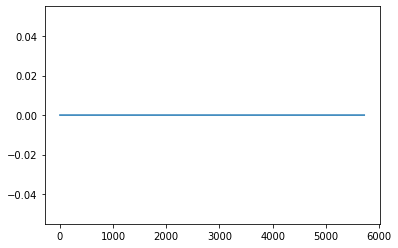

In [48]:
df['favoriteCount'].astype(int).plot()

In [49]:
df=df.drop(columns=['favoriteCount'])

In [50]:
df.isna().value_counts()

kind   etag   id     snippet  contentDetails  defaultAudioLanguage  title  publishedAt  tags   tagsCount  commentCount  likeCount  viewCount
False  False  False  False    False           True                  False  False        False  False      False         False      False        3955
                                              False                 False  False        False  False      False         False      False        1764
                                                                                                          True          False      False           2
                                              True                  False  False        False  False      False         True       False           2
dtype: int64

In [51]:
df=df.fillna(0)

<h5 align='right'>Change the data type</h5>
<hr color='f47b0a'>

In [52]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'], infer_datetime_format=True)
df['publishedAt'] = df['publishedAt'].dt.tz_localize(None) #to save as excel files
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   kind                  5723 non-null   object        
 1   etag                  5723 non-null   object        
 2   id                    5723 non-null   object        
 3   snippet               5723 non-null   object        
 4   contentDetails        5723 non-null   object        
 5   defaultAudioLanguage  5723 non-null   object        
 6   title                 5723 non-null   object        
 7   publishedAt           5723 non-null   datetime64[ns]
 8   tags                  5723 non-null   string        
 9   tagsCount             5723 non-null   int64         
 10  commentCount          5723 non-null   object        
 11  likeCount             5723 non-null   object        
 12  viewCount             5723 non-null   object        
dtypes: datetime64[ns](

In [53]:
df['likeCount'] = df['likeCount'].astype(int)
df['commentCount'] =df['commentCount'].astype(int)
df['viewCount'] =df['viewCount'].astype(int)
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   kind                  5723 non-null   object        
 1   etag                  5723 non-null   object        
 2   id                    5723 non-null   object        
 3   snippet               5723 non-null   object        
 4   contentDetails        5723 non-null   object        
 5   defaultAudioLanguage  5723 non-null   object        
 6   title                 5723 non-null   object        
 7   publishedAt           5723 non-null   datetime64[ns]
 8   tags                  5723 non-null   string        
 9   tagsCount             5723 non-null   int64         
 10  commentCount          5723 non-null   int64         
 11  likeCount             5723 non-null   int64         
 12  viewCount             5723 non-null   int64         
dtypes: datetime64[ns](

In [54]:
df['title']= pd.Series(df['title'], dtype="string")


In [55]:
df['title'][0]

'timbersports training is wild \U0001fa9a \U0001fa93'

<h5 align='right'>Save the new dataset</h5>
<hr color='f47b0a'>

In [56]:
df.to_excel(r'/content/drive/MyDrive/Colab Notebooks/video_data_clean.xlsx',
            index = False, header=True)
